In [39]:
class Value: 
    
    def __init__(self,data,_children=(),op='',label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        return out
    
    def __mul__(self,other):
        out = Value (self.data * other.data, (self, other),'*')
        return out
    
a = Value(2.0,label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b;e.label='e'
d = e + c;d.label='d'
f = Value(-2.000,label='f')
L = d * f;L.label="L"

In [40]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
            
    return dot   
    

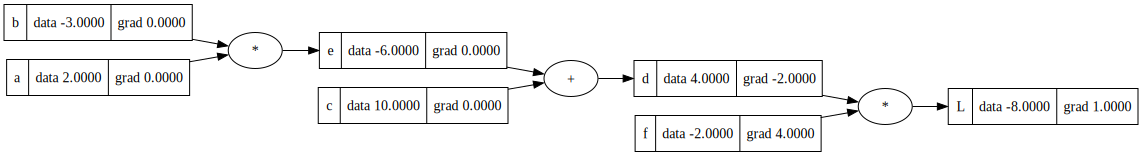

In [72]:
draw_dot(L)

In [73]:
a.data += 0.001 * a.grad
b.data += 0.001 * b.grad
c.data += 0.001 * c.grad
f.data += 0.001 * f.grad

e = a*b;e.label='e'
d = e + c;d.label='d'
L = d * f;L.label="L"

L

Value(data=-8.0)

In [71]:
def LOL():
    h = 0.0001
    
    a = Value(2.0,label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b;e.label='e'
    d = e + c;d.label='d'
    f = Value(-2.000,label='f')
    L = d * f;L.label="L"
    L1 = L.data
    
    a = Value(2.0,label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b;e.label='e'
    d = (e + c);d.label='d'
    f = Value(-2.000,label='f')
    L = (d * f);L.label="L"
    L2 = L.data 
    

In [69]:
LOL()

0.0
